# 

<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Redes Generativas Adversarias</center></span>

<figure>
<center>
<img src="../Imagenes/flowers_Carpatian.jpg" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Generador y discriminador de una GAN </p>
</figcaption>
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:%D0%9D%D0%B0%D0%B9%D0%BA%D1%80%D0%B0%D1%89%D1%96_%D0%BC%D0%B8%D1%82%D1%96_%D0%B6%D0%B8%D1%82%D1%82%D1%8F.jpg">Misha Reme</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons



## <span style="color:#4361EE">Coordinador</span>

- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Referencias</span>

1. [Rowel Atiesa, Advanced Deep Learning with Tensorflow 2 and Keras, second ed., Pack, 2020](https://www.oreilly.com/library/view/advanced-deep-learning/9781838821654/)
1. [Ejemplos de Keras](https://keras.io/examples/generative/dcgan_overriding_train_step/)
1. [Tutoriales-Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)
1. [Soumith, How to Train a GAN? Tips and tricks to make GANs workHow to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks/blob/master/README.mdhttps://github.com/soumith/ganhacks/blob/master/README.md), in Github.

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Preliminares](#Preliminares)
* [Componentes de una GAN](#Componentes-de-una-GAN)
* [Definir la pérdida y los optimizadores](#Definir-la-pérdida-y-los-optimizadores)
* [Guardar puntos de control](#Guardar-puntos-de-control)
* [Redes competitivas o colaborativas](#Redes-competitivas-o-colaborativas)
* [Ciclo de entrenamiento](#Ciclo-de-entrenamiento)

## <span style="color:blue">Introducción</span>

¿Qué son las GAN?

Las redes generativas adversarias (GAN) son una de las más interesantes ideas de la inteligencia artificial hoy en día. Dos modelos son entrenados simultáneamente por un proceso contradictorio. Un `generador` ( "el artista") aprende a crear imágenes que parecen reales, mientras que un `discriminador` ( "el crítico de arte") aprende a decidir si las imágenes son reales o no.

El propósito del entrenamiento es que el generador aprenda a crear imágenes de tal calidad que el discriminador no logre diferenciar si son reales o `falsificaciones`. En  paralelo, el discriminador se vuelve el mejor en detectar falsificaciones. Las GAN fueron propuestas por [Ian Goodfellow](https://en.wikipedia.org/wiki/Ian_Goodfellow), estudiante de doctorado de [Yoshua BengioYoshua Bengio](https://en.wikipedia.org/wiki/Yoshua_Bengio).

La siguiente imagen tomada de los tutoriales de Google, ilustra los principales elementos que se requieren para construir una GAN. 

<figure>
<center>
<img src="../Imagenes/gan1.png" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Generador y discriminador de una GAN </p>
</figcaption>
</figure>

Fuente: [Tutoriales-Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)

Durante el entrenamiento, el generador se vuelve progresivamente cada vez más capaz de crear imágenes que parecen reales, mientras que el discriminador se convierte en el mejor para distinguirlas. Se alcanza una situación  de equilibrio cuando el discriminador ya no puede distinguir imágenes reales de los falsos.

<figure>
<center>
<img src="../Imagenes/gan2.png" width="500" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">GAN en acción </p>
</figcaption>
</figure>

Fuente: [Tutoriales-Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)

En esta lección veremos como generar imágenes de caras usando una red generativa adversaria convolucional (DCGAN). Utilizaremos un subconjunto del conjunto de datos de imágenes de MNIST.

## <span style="color:blue">Preliminares</span>

### <span style="color:#4CC9F0">Configuración</span>

In [2]:
"""
## Setup
"""

import tensorflow as tf

tf.__version__

'2.11.0'

In [3]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

### <span style="color:#4CC9F0">Cargue y prepare el conjunto de datos</span>


Utilizaremos el conjunto de datos MNIST para entrenar el generador y el discriminador. El generador generará dígitos escritos a mano que se asemejan a los datos MNIST.

In [4]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normaliza las imágenes to [-1, 1]

In [5]:
# configura hiperparámetros
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [7]:
# Crea dataset. 
# Mezcla los datos  y construye lotes de datos
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## <span style="color:blue">Componentes de una GAN</span>

### <span style="color:#4CC9F0">Generador</span>

La entrada al generador es ruido, y la salida son datos sintetizados. A intervalos regulares, el generador fingirá que su salida son datos genuinos y le pedirá a la GAN que lo etiquete como 1.0. Cuando los datos falsos se presentan al discriminador, naturalmente se clasificará como falso con una etiqueta cercana a 0.0.

El optimizador calcula las actualizaciones de parámetros del generador en función de lo presentado
etiqueta (es decir, 1.0). También tiene en cuenta su propia predicción cuando se entrena con esta nueva información.  En otras palabras, el discriminador tiene algunas dudas con respecto a su predicción, y así, la GAN toma eso en consideración.

La siguiente función crea un generador. Observe que la salida es una red neuronal creada con Keras.

In [8]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Nota: None es el tamaño del lote

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

### <span style="color:#4CC9F0">Prueba del generador aún no  entrenado</span>

Usamos el generador, todavía no entrenado, para crear una imagen.

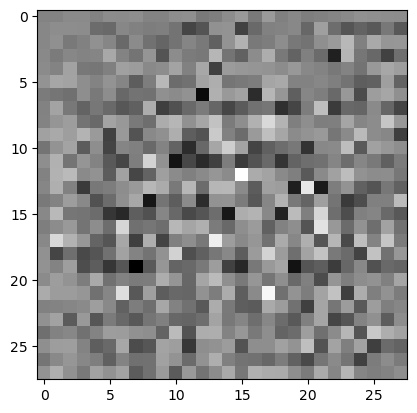

In [9]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.show()

### <span style="color:#4CC9F0">Discriminador</span>

La entrada del discriminador será datos reales o sintetizados. El discriminador recibe  muestras de datos genuinos y muestras  de datos falsos  que provienen del generador. 


Los datos válidos están etiquetados como 1.0 (es decir, un 100% de probabilidad de ser real), mientras que todos los
los datos sintetizados están etiquetados como 0.0 (es decir, un 0% de probabilidad de ser real). 


El proceso de etiquetado está automatizado, por lo que las GAN se consideran modelos de aprendizaje no supervisado. El objetivo del discriminador es aprender a  distinguir datos reales de datos falsos. Durante esta parte del entrenamiento de la GAN, solamente los parámetros del discriminador serán actualizados.

El discriminador es  un clasificador binario típico y será entrenado para predecir en un rango de 0.0 a 1.0 en valores de confianza  tan cerca de 0.0 o 1.0 como sea posible, según reciba un dato falso o uno real.

### <span style="color:#4CC9F0">Crea el discriminador</span>

El discriminador es  una red convolucional de clasificación binaria , la cual asigna una imagen de 64x64 a una puntuación de clasificación binaria: real o falsa. Usaremos la función activación `LeakyReLU` para cada una de las capas internas. Esta función de activación es definida como sigue:

$$
\text{LeakyReLU}(x) = \begin{cases} x &\text{ si } x>0\\
\alpha x, \hspace{3mm}0 <\alpha < 1 &\text{ si } x\le 0 \end{cases}
$$

La siguiente función crea un discriminador. Observe que la salida es una red neuronal creada con Keras. La siguiente función crea un generador. Observe que la salida es una red neuronal creada con Keras.

In [10]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

### <span style="color:#4CC9F0">Prueba del discriminador no entrenado aún</span>

Utilizamos el discriminador, todavía no entrenado, para clasificar las imágenes generadas como reales o falsas. El modelo se entrenará para generar valores positivos para imágenes reales y valores negativos para imágenes falsas.

In [12]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00013375]], shape=(1, 1), dtype=float32)


## <span style="color:blue">Definir la pérdida y los optimizadores</span>

Definir funciones de pérdida y optimizadores para ambos modelos.

In [14]:
# Este método devuelve una función auxiliar para calcular la pérdida de entropía cruzada
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### <span style="color:#4CC9F0">Pérdida de discriminador</span>

Este método cuantifica qué tan bien el discriminador es capaz de distinguir las imágenes reales de las falsificaciones. Compara las predicciones del discriminador sobre imágenes reales con un arreglo de 1's y las predicciones del discriminador sobre imágenes falsas (generadas) con un arreglo de 0's.

In [18]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### <span style="color:#4CC9F0">Pérdida del generador</span>

La pérdida del generador cuantifica qué tan bien pudo engañar al discriminador. Intuitivamente, si el generador funciona bien, el discriminador clasificará las imágenes falsas como reales (o 1). Aquí, compara las decisiones de los discriminadores en las imágenes generadas con una matriz de 1.

In [17]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### <span style="color:#4CC9F0">Optimizadores</span>

Los optimizadores discriminador y generador son diferentes ya que entrenará dos redes por separado.

In [19]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## <span style="color:blue">Guardar puntos de control</span>

Esta lección también demuestra cómo guardar y restaurar modelos, lo que puede ser útil en caso de que se interrumpa una tarea de entrenamiento de larga duración.

In [20]:
checkpoint_dir = '../checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## <span style="color:blue">Redes competitivas o colaborativas</span>

En general, todo el proceso es similar a dos redes que compiten entre sí mientras siguen cooperando al mismo tiempo. Cuando el entrenamiento de GAN converge, al final el resultado es un generador que puede sintetizar datos que parecen genuinos. 

El discriminador piensa que estos datos sintetizados son reales o con una etiqueta cercana a 1.0, lo que significa que el discriminador puede ser descartado. La parte del generador será útil para producir salidas significativas de entradas de ruido arbitrarias.

La siguiente imagen describe el proceso de entrenamiento de una GAN

<figure>
<center>
<img src="../Imagenes/GAN_trainig.png" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Esquema de entrenamiento de una GAN </p>
</figcaption>
</figure>

## <span style="color:blue">Ciclo de entrenamiento</span>

El ciclo de entrenamiento comienza cuando el generador recibe una semilla aleatoria como entrada. Esa semilla se usa para producir una imagen. Luego, el discriminador se usa para clasificar imágenes reales (extraídas del conjunto de entrenamiento) e imágenes falsas (producidas por el generador). La pérdida se calcula para cada uno de estos modelos y los gradientes se utilizan para actualizar el generador y el discriminador

<figure>
<center>
<img src="../Imagenes/gan_training2.png" width="400" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Entradas al discriminador </p>
</figcaption>
</figure>

Fuente [Soumith, How to Train a GAN? Tips and tricks to make GANs workHow to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks/blob/master/README.mdhttps://github.com/soumith/ganhacks/blob/master/README.md), in Github.

### <span style="color:#4CC9F0">Paso de entrenamiento</span>

In [24]:
# Note el uso de `tf.function`
# Esta anotación hace que la función sea "compilada"

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
  
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

### <span style="color:#4CC9F0">Función  de entrenamiento</span>

In [23]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# Reutilizaremos esta semilla con el tiempo (para que sea más fácil)
# para visualizar el progreso en el GIF animado)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [28]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
    
        for image_batch in dataset:
            train_step(image_batch)

        # Produce imágenes para el GIF sobre la marcha
        display.clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)

        # Guarda el modelo cada 5 épocas
        if (epoch + 1) % 5 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('El tiempo de la época  {} es {} segundos'.format(epoch + 1, time.time()-start))

    # Genera luego de la última época
    display.clear_output(wait=True)
    generate_and_save_images(generator, epochs,  seed)

### <span style="color:#4CC9F0">Genera y guarda imágenes</span>

Para poder monitorear en línea el proceso de entrenamiento, Al final de cada época se generan algunas imágenes aleatoriamente. En este ejercicio hemos generado 10 imágenes en cada paso.

In [26]:
def generate_and_save_images(model, epoch, test_input):
    # Observe que `entrenamiento` está establecido en False.
    # Esto es para que todas las capas se ejecuten en modo de inferencia (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

### <span style="color:#4CC9F0">Entrena el modelo de lado a lado</span>

Con todo lo anterior, así podemos entrenar nuestro modelo.

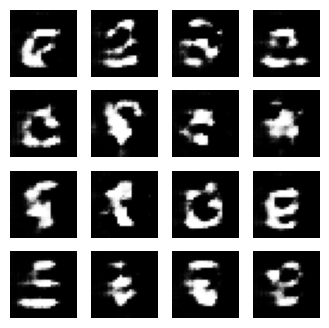

El tiempo de la épocs  7 es1958.8905112743378 segundos


In [ ]:
train(train_dataset, EPOCHS)

Restaura el último punto de control

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

### <span style="color:#4CC9F0">Crea un gif</span>

In [ ]:
Estas son algunas de las imágenes que se generaron durante el entrenamiento.

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
    return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))


In [ ]:
display_image(EPOCHS)

Usa imageio para crear un gif animado usando las imágenes guardadas durante el entrenamiento.


In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)